<a href="https://colab.research.google.com/github/aakhavi/Machine-Learning-in-Python/blob/main/GSB_545_Gradient_Boosting_%26_XGBoosting_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arash Akhavi
# Gradient Boosting & XGBoosting Activity 
# 4/20/2022

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB

In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/GSB 545 Data/penguins_lter.csv")
data2 = pd.read_csv("/content/drive/MyDrive/GSB 545 Data/penguins_size.csv")
data2 = pd.get_dummies(data2, columns = ['island', 'sex',], prefix = '', prefix_sep = '')
data2 = data2.dropna()
#data = data.drop(['studyName', 'Sample Number', 'Region', 'Individual ID', 'Stage', 'Comments', 'Clutch Completion', 'Date Egg'], axis=1)
data2 = data2.drop(['.'], axis = 1)
data2.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,FEMALE,MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [ ]:
X = data2.drop(['species'],axis=1)
Y = data2['species']

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Create model
# Gradient Boost
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_gradient = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise',)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_gradient), std(n_scores_gradient)))

Accuracy: 0.985 (0.020)


In [ ]:
# AdaBoost
AdaBoost = AdaBoostClassifier(n_estimators=400,learning_rate=0.5,algorithm='SAMME')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_ada = cross_val_score(AdaBoost, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_ada), std(n_scores_ada)))

Accuracy: 0.990 (0.017)


In [ ]:
# XGBoost
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_xgb = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise', )
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_xgb), std(n_scores_xgb)))

Accuracy: 0.986 (0.021)


In [ ]:
results = [n_scores_gradient, n_scores_ada, n_scores_xgb]
methods = ['Gradient Boosting', 'XGB', 'AdaBoost']

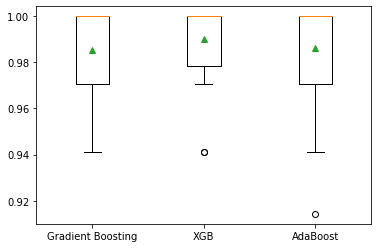

In [ ]:
from matplotlib import pyplot
pyplot.boxplot(results, labels=methods, showmeans=True)
pyplot.show()